In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, chi2_contingency
import numpy as np

combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\3053722725.py:6: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_df = pd.read_csv('..\\DATA\\combined_data.csv')


In [28]:
pd.set_option('display.max_columns', None)
combined_df.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,WFO,BEGIN_DATE_TIME,CZ_TIMEZONE,END_DATE_TIME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,TOR_OTHER_WFO,TOR_OTHER_CZ_STATE,TOR_OTHER_CZ_FIPS,TOR_OTHER_CZ_NAME,BEGIN_RANGE,BEGIN_AZIMUTH,BEGIN_LOCATION,END_RANGE,END_AZIMUTH,END_LOCATION,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,199806,2,2050,199806,2,2100,2149256,5669115,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:50:00,EST,02-JUN-98 21:00:00,0,0,0,0,1M,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,3.0,300.0,NaN,NaN,NaN,NaN,4.0,W,FRIENDSVILLE,3.0,SW,FRIENDSVILLE,39.67,-79.50,39.63,-79.45,An F2 tornado passed southeast through souther...,NaN,PDC
1,199806,2,2038,199806,2,2042,2149257,5669116,MARYLAND,24.0,1998,June,Tornado,C,23,GARRETT,PBZ,02-JUN-98 20:38:00,EST,02-JUN-98 20:42:00,0,0,0,0,.5M,NaN,NWS STORM SURVEY,2.0,NaN,NaN,NaN,F2,2.5,700.0,NaN,NaN,NaN,NaN,1.0,NW,FINZEL,2.0,SE,FINZEL,39.73,-78.97,39.70,-78.93,An F2 tornado passed through the town of Finze...,NaN,PDC
2,199806,13,1545,199806,13,1545,2149637,5668053,OKLAHOMA,40.0,1998,June,Tornado,C,11,BLAINE,OUN,13-JUN-98 15:45:00,CST,13-JUN-98 15:45:00,1,0,0,0,NaN,NaN,LAW ENFORCEMENT,NaN,NaN,NaN,NaN,F0,0.1,10.0,NaN,NaN,NaN,NaN,1.0,W,LONGDALE,1.0,W,LONGDALE,36.13,-98.57,36.13,-98.57,"Summary of events of June 13, 1998:During the ...",The Blaine County Sheriff reported a brief tor...,PDC
3,199806,2,2045,199806,2,2050,2149255,5669114,WEST VIRGINIA,54.0,1998,June,Tornado,C,77,PRESTON,PBZ,02-JUN-98 20:45:00,EST,02-JUN-98 20:50:00,0,0,0,0,5M,2M,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F2,4.0,300.0,NaN,NaN,NaN,NaN,1.0,NW,GLADE FARMS,3.0,SE,GLADE FARMS,39.72,-79.55,39.67,-79.50,An F2 tornado passed southeast through souther...,NaN,PDC
4,199806,2,1720,199806,2,1728,2149234,5668877,PENNSYLVANIA,42.0,1998,June,Tornado,C,129,WESTMORELAND,PBZ,02-JUN-98 17:20:00,EST,02-JUN-98 17:28:00,0,0,0,0,NaN,NaN,NWS STORM SURVEY,NaN,NaN,NaN,NaN,F1,6.0,300.0,NaN,NaN,NaN,NaN,3.0,NW,IRWIN,3.0,SE,MANOR,40.37,-79.75,40.30,-79.63,An F1 tornado touched down 5 miles northwest o...,NaN,PDC


In [29]:
columns_need = [
    'BEGIN_YEARMONTH','BEGIN_DATE_TIME', 'YEAR', 'STATE', 'MONTH_NAME', 
    'INJURIES_DIRECT', 'INJURIES_INDIRECT', 'DEATHS_DIRECT', 
    'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS', 
    'TOR_F_SCALE', 'TOR_LENGTH', 'BEGIN_LON', 'BEGIN_LAT'
]
df = combined_df[columns_need]
df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']
df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']
df.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\793084218.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['INJURIES_TOTAL']=df['INJURIES_DIRECT']+df['INJURIES_INDIRECT']


C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\793084218.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATHS_TOTAL']=df['DEATHS_DIRECT']+df['DEATHS_INDIRECT']


,BEGIN_YEARMONTH,BEGIN_DATE_TIME,YEAR,STATE,MONTH_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,TOR_F_SCALE,TOR_LENGTH,BEGIN_LON,BEGIN_LAT,INJURIES_TOTAL,DEATHS_TOTAL
0,199806,02-JUN-98 20:50:00,1998,MARYLAND,June,0,0,0,0,1M,NaN,F2,3.0,-79.50,39.67,0,0
1,199806,02-JUN-98 20:38:00,1998,MARYLAND,June,0,0,0,0,.5M,NaN,F2,2.5,-78.97,39.73,0,0
2,199806,13-JUN-98 15:45:00,1998,OKLAHOMA,June,1,0,0,0,NaN,NaN,F0,0.1,-98.57,36.13,1,0
3,199806,02-JUN-98 20:45:00,1998,WEST VIRGINIA,June,0,0,0,0,5M,2M,F2,4.0,-79.55,39.72,0,0
4,199806,02-JUN-98 17:20:00,1998,PENNSYLVANIA,June,0,0,0,0,NaN,NaN,F1,6.0,-79.75,40.37,0,0


In [30]:
def convert_damage_to_millions(value):
    if isinstance(value, str):
        value = value.strip()  
        if value == '': 
            return None  
        if 'M' in value: 
            value = value.replace('M', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000_000
        elif 'K' in value:
            value = value.replace('K', '').strip()
            if value == '': 
                return None 
            return float(value) * 1_000
        else:
            try:
                return float(value)  
            except ValueError:
                return None 
    elif isinstance(value, (int, float)):
        return value
    else:
        return None  

df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\3381420839.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].apply(convert_damage_to_millions)
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\3381420839.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAMAGE_PROPERTY'] = df['DAMAGE_PROPERTY'].fillna(0)


AttributeError: 'Index' object has no attribute 'strftime'

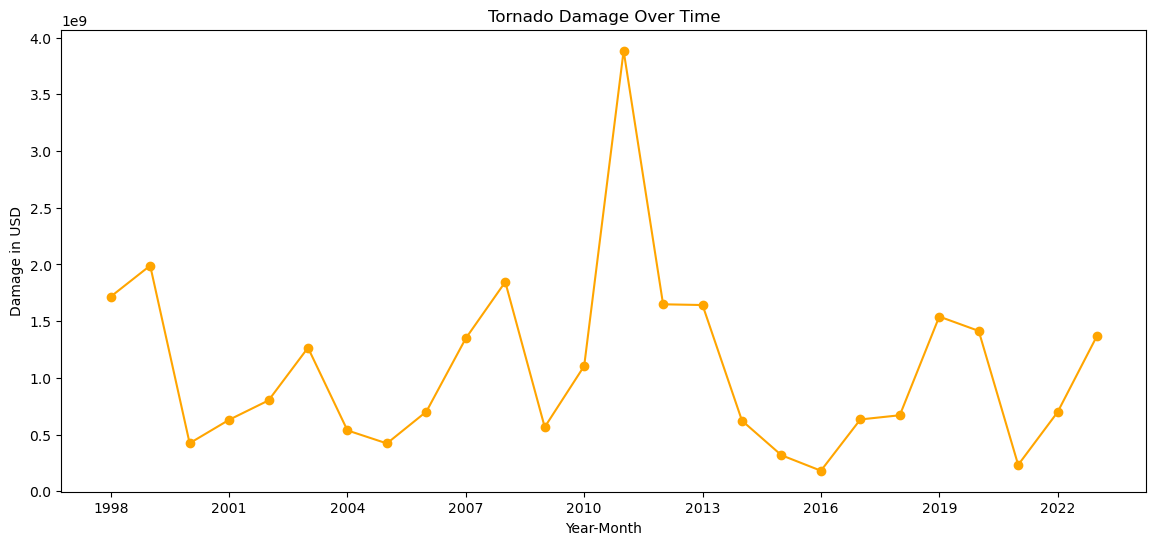

In [31]:
def plot_with_specific_years(x_values, y_values, title, xlabel, ylabel, color='blue'):
    plt.figure(figsize=(14, 6))  # Increase figure size to give more space
    plt.plot(x_values, y_values, marker='o', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Set x-ticks for every third month
    ax = plt.gca()
    ax.set_xticks(x_values[::3])  # Show every third month to reduce clutter
    ax.set_xticklabels(x_values[::3].strftime('%Y-%m'), rotation=45)
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##Ignore error, it works
tornado_damage = df.groupby(df['YEAR'])['DAMAGE_PROPERTY'].sum()
plot_with_specific_years(tornado_damage.index, tornado_damage.values,
                         title='Tornado Damage Over Time',
                         xlabel='Year-Month', ylabel='Damage in USD', color='orange')

In [32]:
num_per_year  = df.groupby('YEAR').size().reset_index(name='NUM_TORNADOES')
num_per_year

,YEAR,NUM_TORNADOES
0,1998,1529
1,1999,1520
2,2000,1169
3,2001,1351
4,2002,1040
5,2003,1535
6,2004,1947
7,2005,1343
8,2006,1263
9,2007,1242


Slope: -0.5846153846153849
Intercept: 2583.292307692308
R-squared: 0.0002412552759276469
P-value: 0.9399687443213751


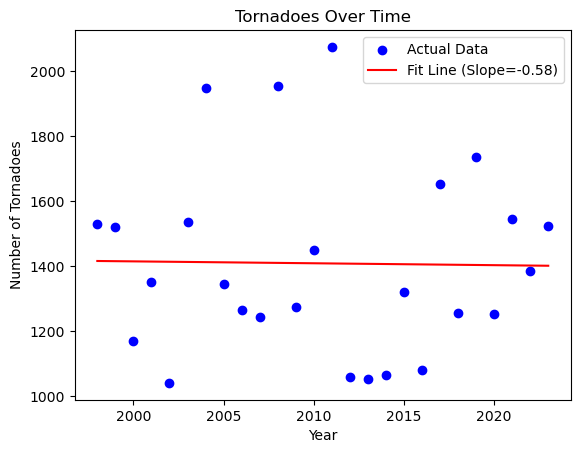

In [33]:
years = num_per_year['YEAR']
tornadoes = num_per_year['NUM_TORNADOES']

slope, intercept, r_value, p_value, std_err = linregress(years, tornadoes)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, tornadoes, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.title('Tornadoes Over Time')
plt.legend()
plt.show()


Slope: -9820740.694017092
Intercept: 20829574613.398285
R-squared: 0.009091438710563943
P-value: 0.6431253407723168


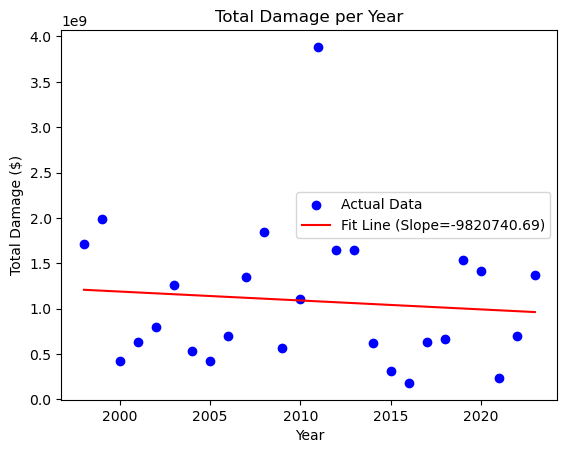

In [34]:
dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].sum().reset_index()
years = dam_per_year['YEAR']
total_damage = dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Damage ($)')
plt.title('Total Damage per Year')
plt.legend()
plt.show()

Slope: -5896.525391267438
Intercept: 12613239.959170062
R-squared: 0.009477870009827612
P-value: 0.636124545858886


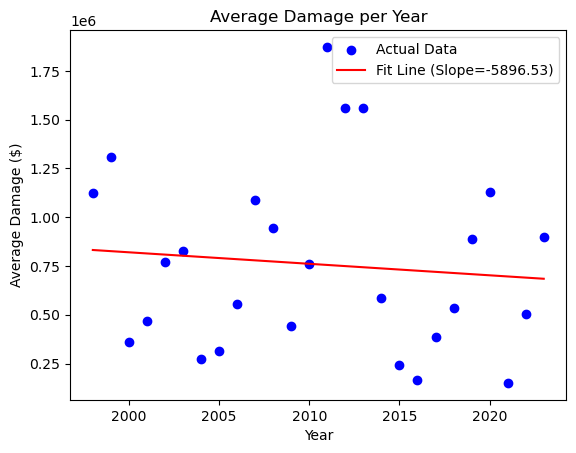

In [35]:
avg_dam_per_year  = df.groupby('YEAR')['DAMAGE_PROPERTY'].mean().reset_index()
years = avg_dam_per_year['YEAR']
total_damage = avg_dam_per_year['DAMAGE_PROPERTY']

slope, intercept, r_value, p_value, std_err = linregress(years, total_damage)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_damage, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Average Damage ($)')
plt.title('Average Damage per Year')
plt.legend()
plt.show()

Slope: -0.5955555555555555
Intercept: 1275.3644444444444
R-squared: 0.001891266056413572
P-value: 0.8329315778118441


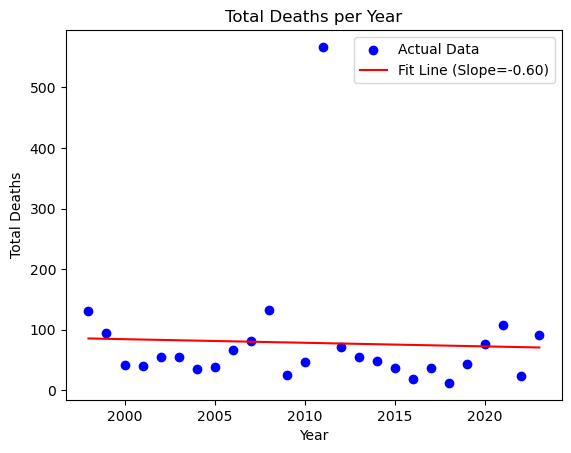

In [36]:
deaths_per_year  = df.groupby('YEAR')['DEATHS_TOTAL'].sum().reset_index()
years = deaths_per_year['YEAR']
total_deaths = deaths_per_year['DEATHS_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_deaths)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_deaths, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.title('Total Deaths per Year')
plt.legend()
plt.show()

Slope: -26.732991452991453
Intercept: 54750.52547008547
R-squared: 0.03853922845546724
P-value: 0.3364638343666011


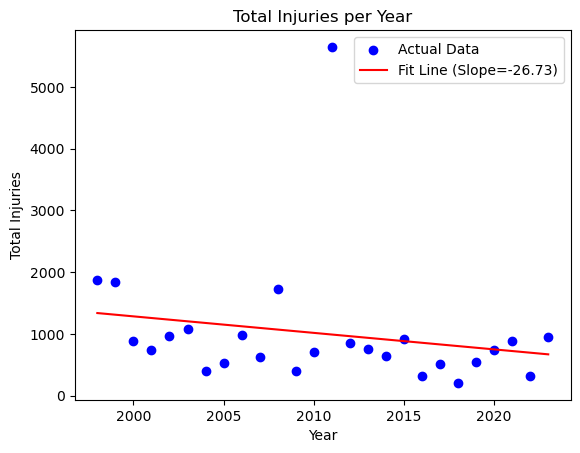

In [37]:
injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
years = injuries_per_year['YEAR']
total_injuries = injuries_per_year['INJURIES_TOTAL']

slope, intercept, r_value, p_value, std_err = linregress(years, total_injuries)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

plt.scatter(years, total_injuries, color='blue', label='Actual Data')
plt.plot(years, intercept + slope * years, 'r', label=f'Fit Line (Slope={slope:.2f})')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.title('Total Injuries per Year')
plt.legend()
plt.show()

In [38]:
#injuries_per_year  = df.groupby('YEAR')['INJURIES_TOTAL'].sum().reset_index()
total_tornadoes = df.groupby('YEAR').size().reset_index(name='TOTAL_TORNADOES')
deadly_tornadoes = df[df['DEATHS_TOTAL'] > 1].groupby('YEAR').size().reset_index(name='NUMBER_OF_DEADLY_TORNADOES')
tornado_prop = pd.merge(total_tornadoes, deadly_tornadoes, on='YEAR', how='left')
tornado_prop

,YEAR,TOTAL_TORNADOES,NUMBER_OF_DEADLY_TORNADOES
0,1998,1529,17
1,1999,1520,14
2,2000,1169,5
3,2001,1351,11
4,2002,1040,14
5,2003,1535,12
6,2004,1947,5
7,2005,1343,5
8,2006,1263,10
9,2007,1242,13


In [39]:
df.TOR_F_SCALE.value_counts()

TOR_F_SCALE
EF0    11542
EF1     8197
F0      7933
F1      3320
EF2     2291
EFU     1097
F2      1048
EF3      614
F3       345
EF4      132
F4        68
EF5       14
F5         5
Name: count, dtype: int64

In [40]:

category_order = ['FU','F0', 'F1', 'F2', 'F3', 'F4', 'F5']
df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)

df.F_SCALE_SIMPLE.value_counts()

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\3878681004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = df['TOR_F_SCALE'].str[-2:]
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\3878681004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE_SIMPLE'] = pd.Categorical(df['F_SCALE_SIMPLE'], categories=category_order, ordered=True)


F_SCALE_SIMPLE
F0    19475
F1    11517
F2     3339
FU     1097
F3      959
F4      200
F5       19
Name: count, dtype: int64

In [41]:
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_pivot = df.pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_pivot.reset_index(inplace=True)
f_scale_pivot.head()

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\2857812987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\2857812987.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  f_scale_pivot = df.pivot_table(index='YEAR',


F_SCALE_SIMPLE,YEAR,FU,F0,F1,F2,F3,F4,F5
0,1998,0,914,416,137,48,11,3
1,1999,0,888,381,164,69,16,2
2,2000,0,763,293,83,27,3,0
3,2001,0,866,324,122,31,8,0
4,2002,0,663,243,90,38,6,0


In [42]:

data = f_scale_pivot
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)')

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)

p value is 0.0
Dependent (reject H0)
chi2 statistic:     5974.8
p-value:            0
degrees of freedom: 175
expected frequencies:
[[2074.35807109   43.53243173  772.82963355  457.03100845  132.50208711
    38.056155      7.93663295    0.75398013]
 [2069.65297764   43.43369075  771.07668853  455.99436312  132.20154367
    37.96983539    7.91863095    0.75226994]
 [1863.80513957   39.11377266  694.38534412  410.64113008  119.05276837
    34.19335276    7.13104333    0.67744912]
 [1971.43415205   41.37247269  734.48396134  434.35439193  125.92769946
    36.16791368    7.54283914    0.71656972]
 [1789.11178119   37.54625952  666.557342    394.18438551  114.28164133
    32.82302906    6.84526154    0.65029985]
 [2080.82757457   43.66820059  775.23993294  458.45639577  132.91533433
    38.17484445    7.9613857     0.75633164]
 [2323.72802349   48.76570393  865.73571935  511.97321077  148.43088919
    42.63109396    8.89073909    0.84462021]
 [1969.08160533   41.3231022   733.60748883  433.

In [43]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2003].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
f_scale_first
combined_row = f_scale_first.sum(numeric_only=True).reset_index()
combined_row

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\31734296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\31734296.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df[df['YEAR']<2003].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\31734296.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify o

,F_SCALE_SIMPLE,0
0,YEAR,10000
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [44]:
first_5=combined_row
first_5= first_5[first_5[0] != 10000]
first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)
FCOUNT=first_5
first_5

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\2131578314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'First_5_Count'}, inplace=True)


,F_SCALE,First_5_Count
1,FU,0
2,F0,4094
3,F1,1657
4,F2,596
5,F3,213
6,F4,44
7,F5,5


In [45]:
df['YEAR']=df['YEAR'].astype(int)
f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
f_scale_first = df[df['YEAR']<2018].pivot_table(index='YEAR', 
                                  columns='F_SCALE_SIMPLE', 
                                  aggfunc='size', 
                                  fill_value=0)

f_scale_first.reset_index(inplace=True)
combined_row1 = f_scale_first.sum(numeric_only=True).reset_index()
last_5=combined_row1
last_5= last_5[last_5[0] != 40150]
last_5.rename(columns={'F_SCALE_SIMPLE': 'F_SCALE', 0: 'Last_5_Count'}, inplace=True)
last_5

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\4093109911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YEAR']=df['YEAR'].astype(int)
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\4093109911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df[df['YEAR']>2018].groupby(['YEAR', 'F_SCALE_SIMPLE']).size().reset_index(name='COUNT')
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\4093109911.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Spe

,F_SCALE,Last_5_Count
1,FU,99
2,F0,15909
3,F1,8389
4,F2,2547
5,F3,782
6,F4,171
7,F5,19


In [46]:
FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
FCOUNT=FCOUNT[FCOUNT['First_5_Count'] != 0]
FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
FCOUNT['Last_5_Count']=FCOUNT['Last_5_Count'].astype(int)

FCOUNT

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\1495488655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['Last_5_Count'] = last_5['Last_5_Count']
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\1495488655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FCOUNT['First_5_Count']=FCOUNT['First_5_Count'].astype(int)
C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\1495488655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,F_SCALE,First_5_Count,Last_5_Count
2,F0,4094,15909
3,F1,1657,8389
4,F2,596,2547
5,F3,213,782
6,F4,44,171
7,F5,5,19


In [47]:
np.set_printoptions(suppress=True)

contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table
data = contingency_table
stat, p, dof, expected = chi2_contingency(data) # interpret p-value 
alpha = 0.05 
print("p value is " + str(p)) 
if p <= alpha: 
    print("\nConclusion: The p-value is less than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are statistically significant.")
    print("We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.")
else: 
    print("\nConclusion: The p-value is greater than the alpha level of 0.05.")
    print("This means the differences between the observed frequencies and expected frequencies are not statistically significant.")
    print("We fail to reject the null hypothesis (H0) and conclude that the distributions of tornado counts have not changed significantly over time.")

print(f"chi2 statistic:     {stat:.5g}")
print(f"p-value:            {p:.5g}")
print(f"degrees of freedom: {dof}")
print("expected frequencies:")
print(expected)
print(contingency_table)


p value is 4.721464940708155e-14

Conclusion: The p-value is less than the alpha level of 0.05.
This means the differences between the observed frequencies and expected frequencies are statistically significant.
We reject the null hypothesis (H0) and conclude that the distributions of tornado counts have changed significantly over time.
chi2 statistic:     71.616
p-value:            4.7215e-14
degrees of freedom: 5
expected frequencies:
[[ 3840.11581363 16162.88418637]
 [ 1928.60088305  8117.39911695]
 [  603.38369256  2539.61630744]
 [  191.01710916   803.98289084]
 [   41.27505374   173.72494626]
 [    4.60744786    19.39255214]]
         First_5_Count  Last_5_Count
F_SCALE                             
F0              4094.0       15909.0
F1              1657.0        8389.0
F2               596.0        2547.0
F3               213.0         782.0
F4                44.0         171.0
F5                 5.0          19.0


C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\2892494885.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().unstack(fill_value=0)


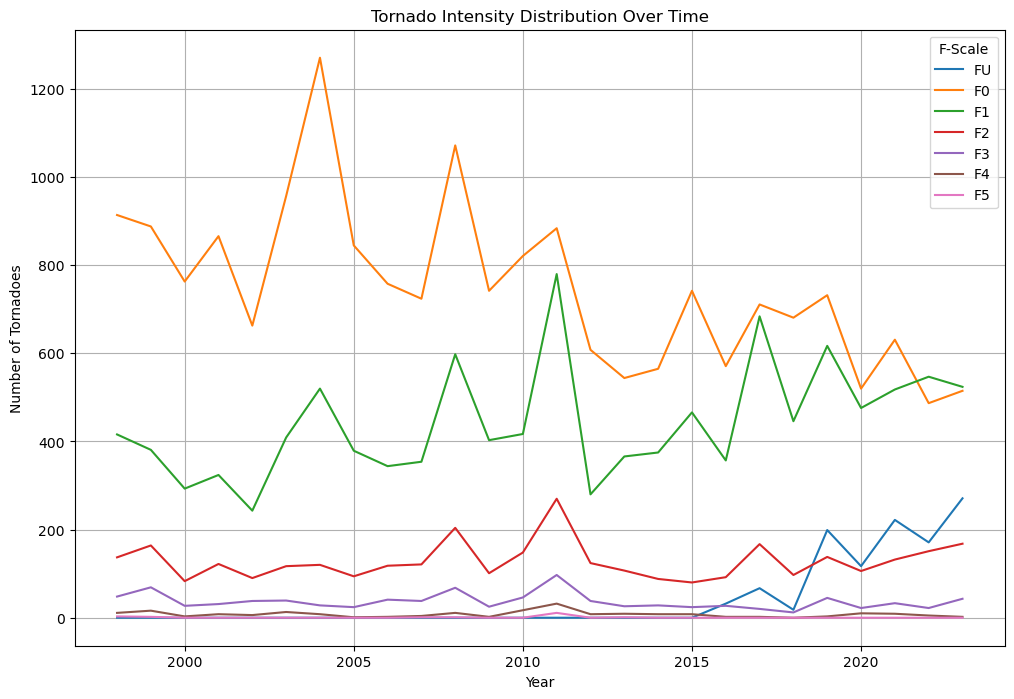

In [48]:
f_scale_count = df.groupby(['YEAR', 'F_SCALE_SIMPLE']).size().unstack(fill_value=0)
f_scale_count.plot(kind='line', figsize=(12, 8))
plt.title('Tornado Intensity Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Tornadoes')
plt.legend(title='F-Scale')
plt.grid(True)
plt.show()


In [50]:
states_of_interest = ['TEXAS', 'MISSISSIPPI', 'OKLAHOMA', 'KANSAS']
years_of_interest = [1999, 2007, 2015, 2023]

state_tornadoes = df[df['STATE'].str.upper().isin(states_of_interest)]
state_tornadoes = state_tornadoes[state_tornadoes['YEAR'].isin(years_of_interest)]

contingency_table = state_tornadoes.groupby(['STATE', 'YEAR']).size().unstack(fill_value=0)

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(expected)

alpha = 0.05
if p < alpha:
    print("The differences in tornado occurrences across states and years are statistically significant .")
else:
    print("The differences in tornado occurrences across states and years are not statistically significant .")


AttributeError: scipy.stats.stats is deprecated and has no attribute chi2_contingency. Try looking in scipy.stats instead.

In [25]:
#Difference between mean damage ($) first 5 years, last 5 years
#Difference between mean frequency per year first 5 years, last 5 years
#Difference between proportion deadly first 5 years, last 5 years

In [85]:
df['F_SCALE'] = df['TOR_F_SCALE'].str[-2:]
df_first = df[df['YEAR']<2003]
df_last= df[df['YEAR']>2018]

C:\Users\Chris\AppData\Local\Temp\ipykernel_17632\896508758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F_SCALE'] = df['TOR_F_SCALE'].str[-2:]


In [93]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df_first['DAMAGE_PROPERTY'], df_last['DAMAGE_PROPERTY'])
print(t_stat)
print(p_value)
print('The mean property damage in the first 5 years is not significantly different\nthan the mean property damage in the last 5 years')

0.727158597924928
0.467140927205836
The mean property damage in the first 5 years is not significantly different
than the mean property damage in the last 5 years


In [87]:
first_freq = df_first.groupby('YEAR').size().reset_index(name='TORNADO_COUNT')
last_freq = df_last.groupby('YEAR').size().reset_index(name='TORNADO_COUNT')
print(first_freq)
print(last_freq)

   YEAR  TORNADO_COUNT
0  1998           1529
1  1999           1520
2  2000           1169
3  2001           1351
4  2002           1040
   YEAR  TORNADO_COUNT
0  2019           1734
1  2020           1251
2  2021           1545
3  2022           1383
4  2023           1523


In [95]:
t_stat, p_value = ttest_ind(first_freq['TORNADO_COUNT'], last_freq['TORNADO_COUNT'])
print(t_stat)
print(p_value)
print('The mean tornado frequency of the first 5 years is not significantly different than the\nmean tornado frequency of the last 5 years')

-1.3116916485687427
0.22601345229852496
The mean tornado frequency of the first 5 years is not significantly different than the
mean tornado frequency of the last 5 years


In [75]:
deadly_tornadoes = df_first[(df_first['INJURIES_DIRECT'] > 0) | (df_first['INJURIES_INDIRECT'] > 0)]
deadly_tornado_frequency = deadly_tornadoes.groupby('YEAR').size().reset_index(name='INJURY_TORNADO_COUNT')
first_freq = first_freq.merge(deadly_tornado_frequency, on='YEAR', how='left')
first_freq = first_freq[['YEAR','TORNADO_COUNT','INJURY_TORNADO_COUNT']]
print(first_freq)
deadly_tornadoes = df_last[(df_last['INJURIES_DIRECT'] > 0) | (df_last['INJURIES_INDIRECT'] > 0)]
deadly_tornado_frequency = deadly_tornadoes.groupby('YEAR').size().reset_index(name='INJURY_TORNADO_COUNT')
last_freq = last_freq.merge(deadly_tornado_frequency, on='YEAR', how='left')
last_freq = last_freq[['YEAR','TORNADO_COUNT','INJURY_TORNADO_COUNT']]
print(last_freq)

   YEAR  TORNADO_COUNT  INJURY_TORNADO_COUNT
0  1998           1529                   168
1  1999           1520                   140
2  2000           1169                    86
3  2001           1351                   120
4  2002           1040                    95
   YEAR  TORNADO_COUNT  INJURY_TORNADO_COUNT
0  2019           1734                    79
1  2020           1251                    74
2  2021           1545                    76
3  2022           1383                    76
4  2023           1523                    97


In [80]:
first_5_total = df_first.shape[0]
first_5_injury = df_first[df_first['INJURIES_TOTAL']>0].shape[0]
print(first_5_total)
print(first_5_injury)
last_5_total = df_last.shape[0]
last_5_injury = df_last[df_last['INJURIES_TOTAL']>0].shape[0]
print(last_5_total)
print(last_5_injury)

6609
609
7436
402


In [96]:
from statsmodels.stats.proportion import proportions_ztest

success_cnts = np.array([last_5_injury, first_5_injury])
total_cnts = np.array([last_5_total, first_5_total])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
print('The proportion of tornados that caused injuries is statistically higher in the first 5 years\nthan the last 5 years')

Two sided z-test: z = -8.7166, p value = 0.0000
The proportion of tornados that caused injuries is statistically higher in the first 5 years
than the last 5 years


In [83]:
contingency_table = FCOUNT.pivot_table(index='F_SCALE', values=['First_5_Count',"Last_5_Count"], fill_value=0)
contingency_table

,First_5_Count,Last_5_Count
F_SCALE,,
F0,4094.0,15909.0
F1,1657.0,8389.0
F2,596.0,2547.0
F3,213.0,782.0
F4,44.0,171.0
F5,5.0,19.0


In [89]:
first_5_total = df_first.shape[0]
first_5_violent = df_first[(df_first['F_SCALE'] == 'F3') | (df_first['F_SCALE'] == 'F4') | (df_first['F_SCALE'] == 'F5')].shape[0]
print(first_5_total)
print(first_5_violent)
last_5_total = df_last.shape[0]
last_5_violent = df_last[(df_last['F_SCALE']=='F3')|(df_last['F_SCALE']=='F4')|(df_last['F_SCALE']=='F5')].shape[0]
print(last_5_total)
print(last_5_violent)

6609
262
7436
194


In [97]:
success_cnts = np.array([last_5_violent, first_5_violent])
total_cnts = np.array([last_5_total, first_5_total])
test_stat, pval = proportions_ztest(count=success_cnts, nobs=total_cnts, alternative='two-sided')
print('Two sided z-test: z = {:.4f}, p value = {:.4f}'.format(test_stat, pval))
print('The proportion of tornados that are F3 and above is significatnly higher in the first five years\nthan the last 5 years')

Two sided z-test: z = -4.5235, p value = 0.0000
The proportion of tornados that are F3 and above is significatnly higher in the first five years
than the last 5 years
